In [36]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import copy


In [37]:
(train_img, train_label) , (test_img, test_label) = fashion_mnist.load_data()
train_img = train_img[0:1000].reshape(-1, 28*28)
train_label = train_label[0:1000]
# print(train_img.shape[1])

In [54]:
class SOM():
    def __init__(self, data, cluster_number, mapping, learning_rate, radius):
        self.data = data
        self.data_shape = data.shape[1]
        self.cluster_number = cluster_number
        self.learning_rate = learning_rate
        self.radius = radius
        self.weights = np.random.normal(size=(self.cluster_number, self.data_shape), scale=100)
        self.old_weights = copy.deepcopy(self.weights)* float('inf')
        self.mapping = mapping

    def update_weight(self, data, mask):
        for i in range(len(mask)):
            self.weights[i, :] += (self.learning_rate * (data - self.weights[i, :])) * mask[i]

    def calculate_min_distance(self, x):
        dist = np.linalg.norm(self.weights - x, axis=1)
        return np.argmin(dist)

    def linear_mapping(self, index):
        mask = np.zeros((self.cluster_number,))
        for i in range(max(0, index - self.radius), min(self.cluster_number, index + self.radius + 1)):
            mask[i] = 1
        return mask

    def square_mapping(self, index):
        n2 = int(np.sqrt(self.cluster_number))
        temp = np.zeros((n2, n2))
        indexi = int(index / n2)
        indexindex = index %(n2)
        temp[max(0, indexi - self.radius):min(n2, indexi + self.radius + 1), max(0, indexindex - self.radius):min(n2, indexindex + self.radius + 1)] = 1
        return temp.flatten()
  

    def stop_condition(self):
        error = np.sum(np.sum(np.power(self.old_weights - self.weights, 2)))
        if error < 1:
            return True
        return False

    def predict(self):
        predictions = {}
        for x in self.data:
            index = self.calculate_min_distance(x)
            if index in predictions:
                predictions[index] += 1
            else:
                predictions[index] =1
        return predictions

    def plot_centers(self, pred):
        temp = []
        for i in pred:
            temp.append((i, pred[i]))
        temp.sort(key=lambda x: x[1])
        temp2 = temp[-20 :]
        plt.figure(figsize=(10, 10))
        for i, tup in enumerate(temp2):
            plt.subplot(5, 4, i+1)
            plt.imshow(self.weights[tup[0], :].reshape(28, 28))
            plt.title(f'cluster {tup[0]}({tup[1]})')
            plt.axis('off')
        plt.show()


    def update(self):
        iteration = 0
        while self.stop_condition() == False:
            self.old_weights = copy.deepcopy(self.weights)
            for data in self.data:
                index = self.calculate_min_distance(data)
                if self.mapping == 'linear':
                  mask = self.linear_mapping(index)
                elif self.mapping == 'square':
                  mask = self.square_mapping(index)
                self.update_weight(data, mask)
            self.learning_rate *= 0.9
            iteration += 1

In [44]:
som = SOM(train_img, 841, 'linear', 2, 0)
som.update()

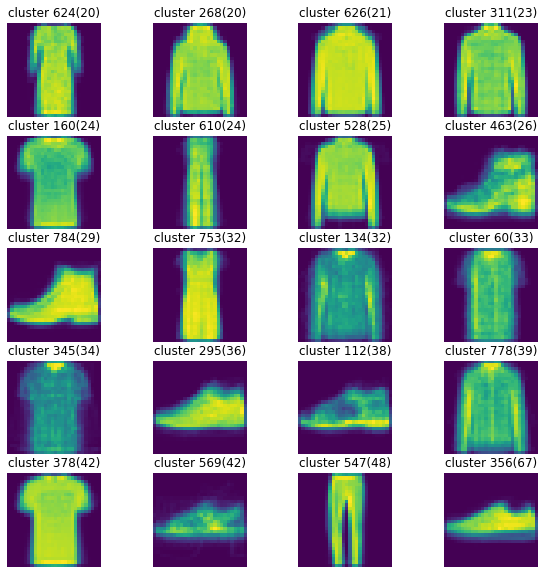

In [45]:
pred = som.predict()
som.plot_centers(pred)

In [46]:
som2 = SOM(train_img, 841, 'linear', 2, 1)
som2.update()

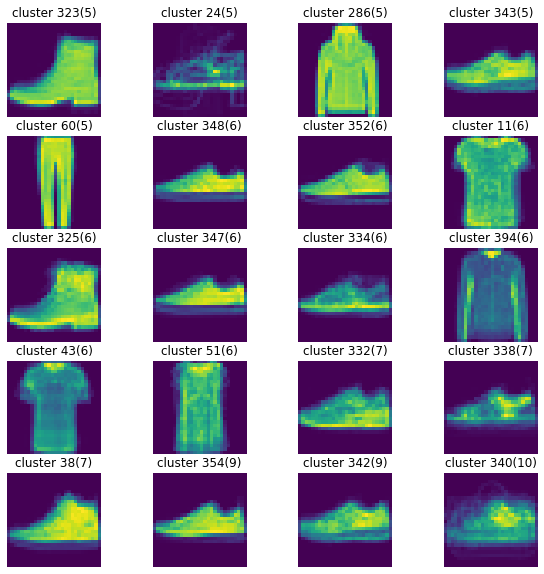

In [56]:
pred = som2.predict()
som2.plot_centers(pred)

In [55]:
som3 = SOM(train_img, 841, 'square', 2, 1)
som3.update()

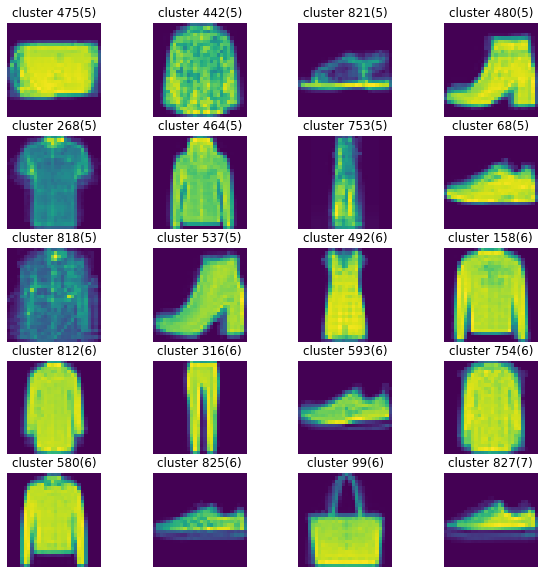

In [57]:
pred = som3.predict()
som3.plot_centers(pred)